<a href="https://colab.research.google.com/github/ouyibei/Smart_Logistics/blob/master/SupplyChain/SupplyChain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pickle
with open('/content/drive/My Drive/Data/data.pkl','rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01,314.640015
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01,311.359985
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,309.720001
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01,304.809998
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01,298.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home

In [32]:
# Modeling for fraud
# Medeling for delay delivery
import numpy as np

train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
#train_data['Delivery Status'].value_counts()
train_data['late_delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [33]:
train_data['Sales'].value_counts()

129.990005    22372
399.980011    17325
199.990005    15622
299.980011    13729
179.970001     5016
              ...  
379.959992       10
999.989990       10
99.000000         9
198.000000        9
396.000000        9
Name: Sales, Length: 193, dtype: int64

In [34]:
train_data['Order Item Quantity'].value_counts()

1    99134
5    20385
3    20350
4    20335
2    20315
Name: Order Item Quantity, dtype: int64

In [35]:
train_data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [12]:
train_data['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [13]:
train_data['late_delivery'].value_counts()

1    98977
0    81542
Name: late_delivery, dtype: int64

In [14]:
import pandas as pd
# display all colums
pd.set_option('display.max_columns', None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. 

In [36]:
# Delete duplicate columns
train_data.drop(['Product Image', 'Customer Password', 'Customer Lname', 'Customer Fname', 'Customer Email'], axis = 1, inplace=True) 
train_data.drop(['Order Status', 'Delivery Status'], axis = 1, inplace=True)
train_data 

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,NaN,1360,73,NaN,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,NaN,1360,73,NaN,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,NaN,1360,73,NaN,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,NaN,1360,73,NaN,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,NaN,1360,73,NaN,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,2016-01-16 03:40:00,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,NaN,1004,45,NaN,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01,399.980011,0,0
180515,DEBIT,3,2,-613.770019,395.980011,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,2016-01-16 01:34:00,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.7

In [37]:
for column in train_data.columns:
    temp =  train_data[column].value_counts()
    print(column, len(temp))

Type 4
Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Late_delivery_risk 2
Category Id 51
Category Name 50
Customer City 563
Customer Country 2
Customer Id 20652
Customer Segment 3
Customer State 46
Customer Street 7458
Customer Zipcode 996
Department Id 11
Department Name 11
Latitude 11250
Longitude 4487
Market 5
Order City 3597
Order Country 164
Order Customer Id 20652
order date (DateOrders) 65752
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Region 23
Order State 1089
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Name 118
Product Price 75
Product Status 1
shipping date (DateOrders) 63701
Shipping Mode 4
Customer Full Name 14025
order_year 4
order_month 12
order_week_d

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Late_delivery_risk             180519 non-null  int64         
 6   Category Id                    180519 non-null  int64         
 7   Category Name                  180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Id                    180519 non-null  int64         
 11  

In [39]:
train_data.drop(['Order Item Id', 'Product Description', 'Product Status', 'Latitude', 'Longitude', 'Customer Street'], axis = 1, inplace=True)
train_data.drop(['Customer Zipcode', 'shipping date (DateOrders)','order date (DateOrders)'],axis=1,inplace=True)

In [40]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,NaN,1360,73,Smart watch,327.750000,Standard Class,CallyHolloway,2018,1,2,22,2018-01,314.640015,0,0
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,Pacific Asia,Bikaner,India,19492,75939,1360,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,NaN,1360,73,Smart watch,327.750000,Standard Class,IreneLuna,2018,1,5,12,2018-01,311.359985,0,1
2,CASH,4,4,-247.779999,309.720001,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,Pacific Asia,Bikaner,India,19491,75938,1360,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,NaN,1360,73,Smart watch,327.750000,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,309.720001,0,0
3,DEBIT,3,4,22.860001,304.809998,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,Pacific Asia,Townsville,Australia,19490,75937,1360,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,NaN,1360,73,Smart watch,327.750000,Standard Class,TanaTate,2018,1,5,11,2018-01,304.809998,0,0
4,PAYMENT,2,4,134.210007,298.250000,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,Pacific Asia,Townsville,Australia,19489,75936,1360,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,NaN,1360,73,Smart watch,327.750000,Standard Class,OrliHendricks,2018,1,5,11,2018-01,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,7,Fan Shop,Pacific Asia,Shanghái,China,1005,26043,1004,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MariaPeterson,2016,1,5,3,2016-01,399.980011,0,0
180515,DEBIT,3,2,-613.770019,395.980011,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7,Fan Shop,Pacific Asia,Hirakata,Japón,9141,26037,1004,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,RonaldClark,2016,1,5,1,2016-01,395.980011,0,1
180516,TRANSFER,5,4,141.110001,391.980011,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,7,Fan Shop,Pacific Asia,Adelaide,Australia,291,26024,1004,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,JohnSmith,2016,1,4,21,2016-01,391.980011,0,1
180517,PAYMENT,3,4,186.229996,387.980011,0,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,7,Fan Shop,Pacific Asia,Adelaide,Australia,2813,26022,1004,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,NaN,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,MarySmith,2016,1

In [41]:
# Check dtypes=object
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

numerical_cols = train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Department Id', 'Order Customer Id',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Price', 'order_year',
       'order_month', 'order_week_day', 'order_hour', 'order_month_year',
       'TotalPrice', 'fraud', 'late_delivery'],
      dtype='object')

In [42]:
train_data['Customer Full Name'] = train_data['Customer Full Name'].astype('str')

In [43]:
from sklearn import preprocessing

# Labelencoder
le = preprocessing.LabelEncoder()
for column in categorical_cols:
    train_data[column] = le.fit_transform(train_data[column])


In [44]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,0,73,40,66,1,20755,0,36,2,4,3,331,70,20755,77202,1360,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,15,475,NaN,1360,73,78,327.750000,3,1875,2018,1,2,22,2018-01,314.640015,0,0
1,3,5,4,-249.089996,311.359985,1,73,40,66,1,19492,0,36,2,4,3,391,69,19492,75939,1360,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,13,841,NaN,1360,73,78,327.750000,3,5374,2018,1,5,12,2018-01,311.359985,0,1
2,0,4,4,-247.779999,309.720001,0,73,40,452,0,19491,0,5,2,4,3,391,69,19491,75938,1360,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,13,841,NaN,1360,73,78,327.750000,3,4426,2018,1,5,12,2018-01,309.720001,0,0
3,1,3,4,22.860001,304.809998,0,73,40,285,0,19490,2,5,2,4,3,3226,8,19490,75937,1360,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,11,835,NaN,1360,73,78,327.750000,3,12922,2018,1,5,11,2018-01,304.809998,0,0
4,2,2,4,134.210007,298.250000,0,73,40,66,1,19489,1,36,2,4,3,3226,8,19489,75936,1360,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,11,835,NaN,1360,73,78,327.750000,3,10632,2018,1,5,11,2018-01,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,0,45,18,59,0,1005,2,31,7,3,3,2922,31,1005,26043,1004,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,7,913,NaN,1004,45,24,399.980011,3,8421,2016,1,5,3,2016-01,399.980011,0,0
180515,1,3,2,-613.770019,395.980011,1,45,18,26,0,9141,1,5,7,3,3,1362,77,9141,26037,1004,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,7,770,NaN,1004,45,24,399.980011,2,11672,2016,1,5,1,2016-01,395.980011,0,1
180516,3,5,4,141.110001,391.980011,1,45,18,55,0,291,1,7,7,3,3,25,8,291,26024,1004,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,11,88,NaN,1004,45,24,399.980011,3,6296,2016,1,4,21,2016-01,391.980011,0,1
180517,2,3,4,186.229996,387.980011,0,45,18,66,1,2813,0,36,7,3,3,25,8,2813,26022,1004,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,11,88,NaN,1004,45,24,399.980011,3,9379,2016,1,4,20,2016-01,387.980011,0,0


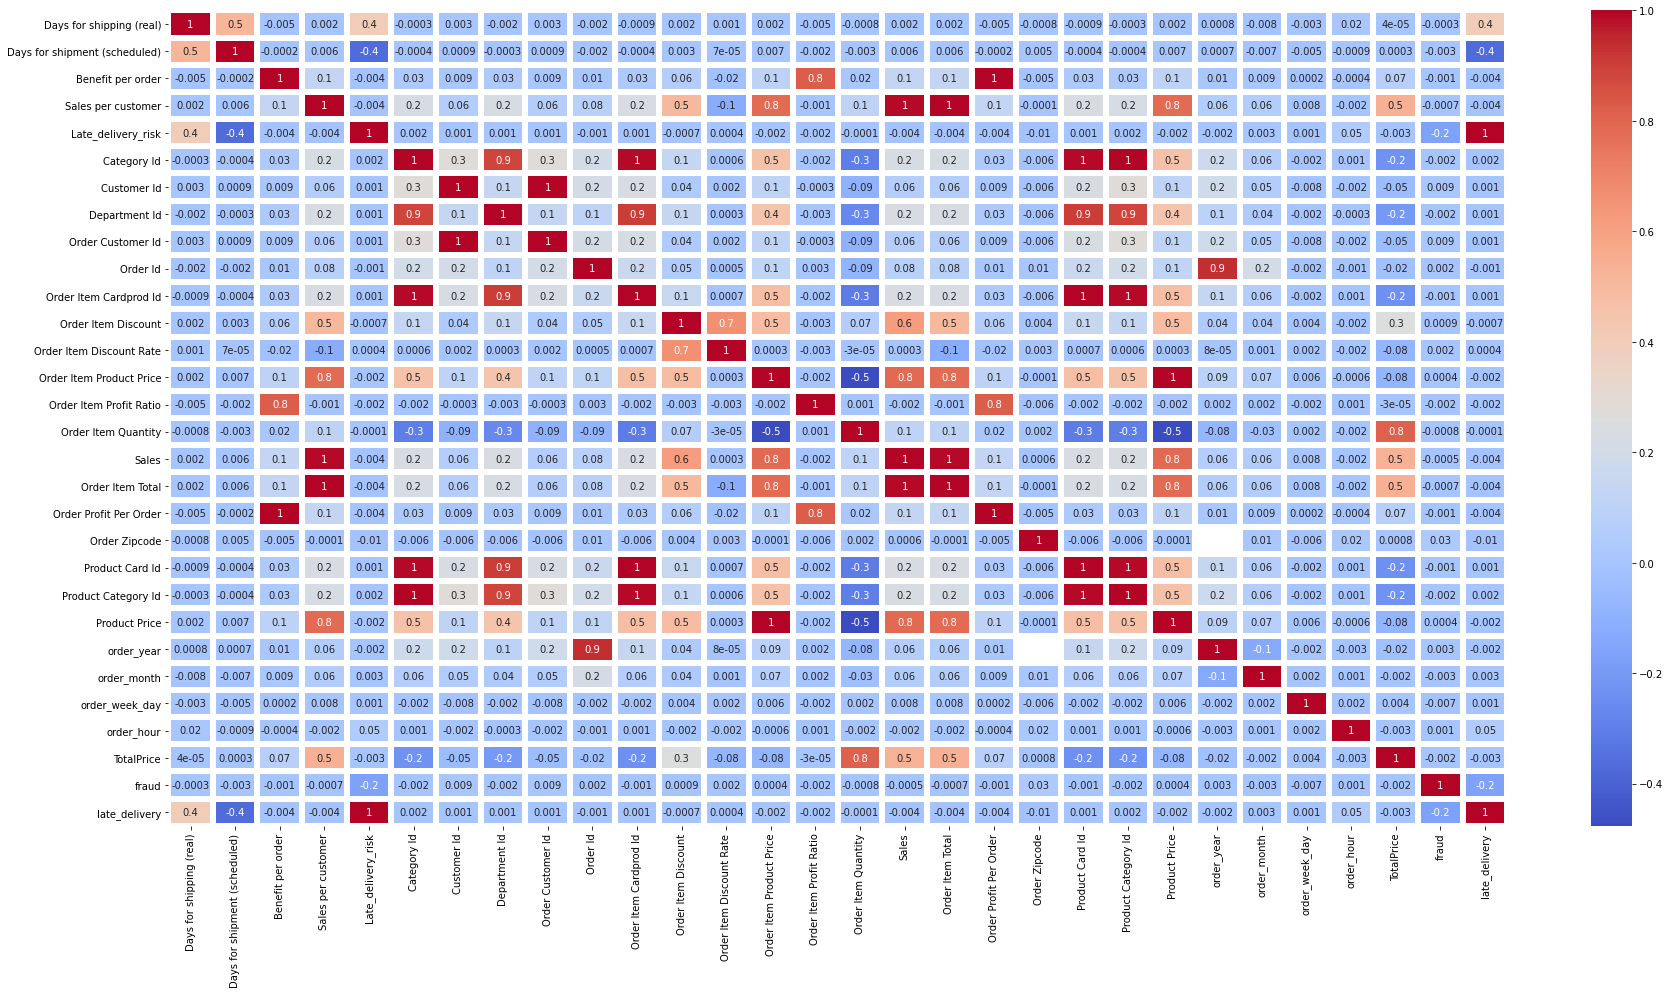

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
temp = train_data[numerical_cols]
sns.heatmap(temp.corr(), annot=True, linewidth=5, fmt='.1g', cmap='coolwarm')
plt.show()

In [46]:
train_data.drop(['Late_delivery_risk'],axis=1, inplace=True)
train_data.drop(['Product Card Id', 'Product Category Id', 'Order Item Total', 'Sales per customer', 'Order Item Cardprod Id','Order Customer Id', 'Product Price'],axis=1, inplace=True)           
#'Order Itme Total', 'Order Profit Per Order', 'Order Profit Per Order']

In [47]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,91.250000,15,475,NaN,78,3,1875,2018,1,2,22,2018-01,314.640015,0,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,-249.089996,13,841,NaN,78,3,5374,2018,1,5,12,2018-01,311.359985,0,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,-247.779999,13,841,NaN,78,3,4426,2018,1,5,12,2018-01,309.720001,0,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,22.860001,11,835,NaN,78,3,12922,2018,1,5,11,2018-01,304.809998,0,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,134.210007,11,835,NaN,78,3,10632,2018,1,5,11,2018-01,298.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,40.000000,7,913,NaN,24,3,8421,2016,1,5,3,2016-01,399.980011,0,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,-613.770019,7,770,NaN,24,2,11672,2016,1,5,1,2016-01,395.980011,0,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,141.110001,11,88,NaN,24,3,6296,2016,1,4,21,2016-01,391.980011,0,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,186.229996,11,88,NaN,24,3,9379,2016,1,4,20,2016-01,387.980011,0,0


In [48]:
train_data.drop(['order_month_year'],axis=1, inplace=True)
train_data.drop(['Order Zipcode'],axis=1, inplace=True)

In [49]:
train_data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Product Name                     0
Shipping Mode                    0
Customer Full Name  

In [50]:
from sklearn.model_selection import train_test_split
# model for fraud
x_fraud = train_data.loc[:, train_data.columns != 'fraud']
y_fraud = train_data['fraud']
# train test split
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)

# model for late delivery
x_late = train_data.loc[:, train_data.columns != 'late_delivery']
y_late = train_data['late_delivery']
# train test split
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)

In [51]:
# model for Sales
x_sales = train_data.loc[:, train_data.columns != 'Sales']
y_sales = train_data['Sales']
# train test split
x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)

# model for Order Item Quantity
x_oiq = train_data.loc[:, train_data.columns != 'Order Item Quantity']
y_oiq = train_data['Order Item Quantity']
# train test split
x_oiq_train, x_oiq_test, y_oiq_train, y_oiq_test = train_test_split(x_oiq, y_oiq, test_size=0.2)

In [52]:
from sklearn.preprocessing import StandardScaler
# Normalisation
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)

x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [53]:
# Normalisationƒ
x_sales_train = sc.fit_transform(x_sales_train)
x_sales_test = sc.transform(x_sales_test)

x_oiq_train = sc.fit_transform(x_oiq_train)
x_oiq_test = sc.transform(x_oiq_test)

In [54]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    confusion = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Model used:', model)
    print('{} Accuray: {}%'.format(name, accuracy*100))
    print('{} Recall: {}%'.format(name, recall*100))
    print('{} Confusion Matrix: \n {}%'.format(name, confusion))
    print('{} F1 score: {}%'.format(name, f1*100))
    return accuracy, recall, f1
    


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#LogisticRegression

# models - LogisticRegression
model_fraud = LogisticRegression()
model_late = LogisticRegression()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fraud Accuray: 97.94759583425659%
Fraud Recall: 54.14012738853503%
Fraud Confusion Matrix: 
 [[35193   144]
 [  597   170]]%
Fraud F1 score: 31.452358926919516%
Model used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Late Delivery Accuray: 98.8339242189231%
Late Delivery Recall: 97.92784367770832%
Late Delivery Confusion Matrix: 
 [[15787   421]
 [    0 19896]]%
Late Delivery F

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error

In [79]:
# LinearRegression for Sales 
# models - LinearRegression
model_sales = linear_model.LinearRegression()

model_sales.fit(x_sales_train, y_sales_train)
y_sales_pred = model_sales.predict(x_sales_test)
#y_salse_pred
#print(model_sales.coef_)
print(mean_squared_error(y_sales_test, y_salse_pred))
#print(model_sales.score(x_sales_train, y_sales_train))

188.1212943286063


In [78]:
# LinearRegression for  Order Item Quantity
# models - LinearRegression

model_oiq = linear_model.LinearRegression()

model_oiq.fit(x_oiq_train, y_oiq_train)
y_oiq_pred = model_oiq.predict(x_oiq_test)
#y_oiq_pred
print(mean_squared_error(y_oiq_test, y_oiq_pred))
#print(model_sales.score(x_oiq_train, y_oiq_train))

0.27554817849763796
-28644.417094338067


In [30]:
# GaussianNB

# models - GaussianNB
model_fraud = GaussianNB()
model_late = GaussianNB()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')


Model used: GaussianNB(priors=None, var_smoothing=1e-09)
Fraud Accuray: 88.1481276312874%
Fraud Recall: 15.200158541418945%
Fraud Confusion Matrix: 
 [[31058  4279]
 [    0   767]]%
Fraud F1 score: 26.38912781696198%
Model used: GaussianNB(priors=None, var_smoothing=1e-09)
Late Delivery Accuray: 57.392532683359185%
Late Delivery Recall: 56.39615635363814%
Late Delivery Confusion Matrix: 
 [[  825 15383]
 [    0 19896]]%
Late Delivery F1 score: 72.11961939284095%


In [59]:
from sklearn.svm import LinearSVC

In [31]:
# LinearSVC ， 
# models - LinearSVC
model_fraud = LinearSVC()
model_late = LinearSVC()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model used: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Fraud Accuray: 97.91158874362952%
Fraud Recall: 52.36363636363637%
Fraud Confusion Matrix: 
 [[35206   131]
 [  623   144]]%
Fraud F1 score: 27.63915547024952%
Model used: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Late Delivery Accuray: 98.8339242189231%
Late Delivery Recall: 97.92784367770832%
Late Delivery Confusion Matrix: 
 [[15787   421]
 [    0 19896]]%
Late Delivery F1 score: 98.9530748762838%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# KNeighborsClassifier
# models - KNeighborsClassifier
model_fraud = KNeighborsClassifier()
model_late = KNeighborsClassifier()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

In [ ]:
#LinearDiscriminantAnalysis
# models - LinearDiscriminantAnalysis
model_fraud = LinearDiscriminantAnalysis()
model_late = LinearDiscriminantAnalysis()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

In [ ]:
# DecisionTreeClassifier
# models - DecisionTreeClassifier
model_fraud = DecisionTreeClassifier()
model_late = DecisionTreeClassifier()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

In [ ]:
# RandomForestClassifier

# models - RandomForestClassifier
model_fraud = RandomForestClassifier()
model_late = RandomForestClassifier()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')

In [ ]:
import xgboost as xgb
# XGBClassifier

# models - XGBClassifier
model_fraud = xgb.XGBClassifier()
model_late = xgb.XGBClassifier()

# train and 
accuracy, recall, f1 = model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, 'Fraud')
accuracy, recall, f1 = model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, 'Late Delivery')